In [1]:
import pandas as pd
from geopy.distance import geodesic
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
data = pd.read_csv('train.csv')
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


Столбец "key" используется для формирования сабмита, можно удалить, так как данные в тесте и сэмпле совпадают

Для более быстрой работы, уберем UTC (если есть)

In [4]:
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x: x[:-4])
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00,-74.005272,40.740027,-73.963280,40.762555,1
55423852,4.2,2009-03-24 20:46:20,-73.957784,40.765530,-73.951640,40.773959,1
55423853,14.1,2011-04-02 22:04:24,-73.970505,40.752325,-73.960537,40.797342,1
55423854,28.9,2011-10-26 05:57:51,-73.980901,40.764629,-73.870605,40.773963,1


In [5]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00,-74.005272,40.740027,-73.963280,40.762555,1
55423852,4.2,2009-03-24 20:46:20,-73.957784,40.765530,-73.951640,40.773959,1
55423853,14.1,2011-04-02 22:04:24,-73.970505,40.752325,-73.960537,40.797342,1
55423854,28.9,2011-10-26 05:57:51,-73.980901,40.764629,-73.870605,40.773963,1


In [6]:
data['pickup_datetime'][0].month

6

In [7]:
# holidays_day = [
#     (1, 1), # New Year
#     (4, 7), # Independence day
#     (25, 12) # Christmas
# ]
# holidays_weekday = [
#     ((22, 11), (28, 11), 3), # Thanksgiving
# ]

In [8]:
for attr in ['year', 'month', 'day', 'hour', 'minute']:
    data[f'pickup_datetime_{attr}'] = [getattr(x, attr) for x in tqdm(data[f'pickup_datetime'])]
    # data[f'pickup_datetime_{attr}'] = data[f'pickup_datetime'].apply(lambda x: getattr(x, attr))
for attr_iter in ['weekday']:
    data[f'pickup_datetime_{attr}'] = [getattr(x, attr_iter)() for x in tqdm(data[f'pickup_datetime'])]
    #data[f'pickup_datetime_{attr_iter}'] = data[f'pickup_datetime'].apply(lambda x: getattr(x, attr_iter)())
#df = df.drop(columns=['pickup_datetime'])
data

  0%|          | 0/55423856 [00:00<?, ?it/s]

  0%|          | 0/55423856 [00:00<?, ?it/s]

  0%|          | 0/55423856 [00:00<?, ?it/s]

  0%|          | 0/55423856 [00:00<?, ?it/s]

  0%|          | 0/55423856 [00:00<?, ?it/s]

  0%|          | 0/55423856 [00:00<?, ?it/s]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00,-74.005272,40.740027,-73.963280,40.762555,1,2014,3,15,3,5
55423852,4.2,2009-03-24 20:46:20,-73.957784,40.765530,-73.951640,40.773959,1,2009,3,24,20,1
55423853,14.1,2011-04-02 22:04:24,-73.970505,40.752325,-73.960537,40.797342,1,2011,4,2,22,5
55423854,28.9,2011-10-26 05:57:51,-73.980901,40.764629,-73.870605,40.773963,1,2011,10,26,5,2


In [9]:
data = data.drop(columns=['pickup_datetime'])
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
55423851,14.0,-74.005272,40.740027,-73.963280,40.762555,1,2014,3,15,3,5
55423852,4.2,-73.957784,40.765530,-73.951640,40.773959,1,2009,3,24,20,1
55423853,14.1,-73.970505,40.752325,-73.960537,40.797342,1,2011,4,2,22,5
55423854,28.9,-73.980901,40.764629,-73.870605,40.773963,1,2011,10,26,5,2


In [32]:
sorted(data['fare_amount'], reverse=True)

[93963.36,
 75747.02,
 61550.86,
 9000.41,
 3130.3,
 2023.7,
 2010.9,
 2004.5,
 1564.5,
 978.0,
 957.0,
 952.0,
 900.0,
 900.0,
 900.0,
 900.0,
 850.0,
 584.16,
 583.83,
 544.44,
 542.8299999999999,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 499.99,
 499.0,
 499.0,
 499.0,
 499.0,
 499.0,
 499.0,
 498.0,
 495.0,
 495.0,
 488.0,
 480.0,
 475.0,
 475.0,
 475.0,
 475.0,
 467.5,
 465.0,
 464.0,
 459.9,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 447.0,
 445.0,
 444.44,
 444.44,
 444.0,
 444.0,
 440.0,
 440.0,
 434.82,
 430.0,
 430.0,
 430.0,
 430.0,
 430.0,
 430.0,
 430.0,
 423.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 420.0,
 411.11,
 411.11,
 400.01,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 4

In [21]:
data['pickup_datetime_year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [10]:
data = data[(data['pickup_longitude'] > -75) & (data['pickup_longitude'] < -71)]
data = data[(data['dropoff_longitude'] > -75) & (data['dropoff_longitude'] < -71)]
data = data[(data['pickup_latitude'] > 40) & (data['pickup_latitude'] < 42)]
data = data[(data['dropoff_latitude'] > 40) & (data['dropoff_latitude'] < 42)]
data = data[data['fare_amount'] < 300]
data = data.reset_index(drop=True)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
54257132,14.0,-74.005272,40.740027,-73.963280,40.762555,1,2014,3,15,3,5
54257133,4.2,-73.957784,40.765530,-73.951640,40.773959,1,2009,3,24,20,1
54257134,14.1,-73.970505,40.752325,-73.960537,40.797342,1,2011,4,2,22,5
54257135,28.9,-73.980901,40.764629,-73.870605,40.773963,1,2011,10,26,5,2


In [ ]:
data['distance'] = [geodesic((data['pickup_latitude'][i], data['pickup_longitude'][i]), (data['dropoff_latitude'][i], data['dropoff_longitude'][i])).km for i in tqdm(range(len(data)))]

  0%|          | 0/54257137 [00:00<?, ?it/s]

<Figure size 1000x1000 with 0 Axes>

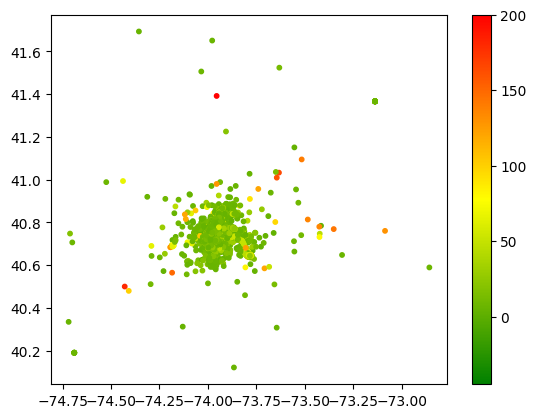

In [34]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt

df = data.iloc[:100_000]

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['fare_amount'],
                    s=10, cmap=cmap)
f.colorbar(points)

Если данные не особо много:

In [ ]:
#data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

Иначе

In [ ]:
x = data['pickup_datetime'][0]
x[0:4], x[5:7], x[8:10], x[11:13], x[14:16], x

In [ ]:
data['pickup_datetime'][0]

In [ ]:
pd.to_datetime(df['pickup_datetime'])[0].hour

In [ ]:
import datetime

datetime.datetime(data['pickup_datetime'][0])

In [ ]:
data['pickup_datetime'][0].years

In [ ]:
pred_data = pd.read_csv('test.csv')
pred_data

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission